In [1]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

In [2]:
#Importing the dataset
df =pd.read_csv('../data/smoking.csv')


# look the data set
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [3]:
# looking the shape DataSet
df.shape

(55692, 27)

In [4]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [5]:
# look  describe data set
df.describe().round(2)

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,...,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00
mean,27845.50,44.18,164.65,65.86,82.05,1.01,1.01,1.03,1.03,121.49,...,57.29,114.96,14.62,1.09,0.89,26.18,27.04,39.95,0.21,0.37
std,16077.04,12.07,9.19,12.82,9.27,0.49,0.49,0.16,0.16,13.68,...,14.74,40.93,1.56,0.40,0.22,19.36,30.95,50.29,0.41,0.48
min,0.00,20.00,130.00,30.00,51.00,0.10,0.10,1.00,1.00,71.00,...,4.00,1.00,4.90,1.00,0.10,6.00,1.00,1.00,0.00,0.00
25%,13922.75,40.00,160.00,55.00,76.00,0.80,0.80,1.00,1.00,112.00,...,47.00,92.00,13.60,1.00,0.80,19.00,15.00,17.00,0.00,0.00
50%,27845.50,40.00,165.00,65.00,82.00,1.00,1.00,1.00,1.00,120.00,...,55.00,113.00,14.80,1.00,0.90,23.00,21.00,25.00,0.00,0.00
75%,41768.25,55.00,170.00,75.00,88.00,1.20,1.20,1.00,1.00,130.00,...,66.00,136.00,15.80,1.00,1.00,28.00,31.00,43.00,0.00,1.00
max,55691.00,85.00,190.00,135.00,129.00,9.90,9.90,2.00,2.00,240.00,...,618.00,1860.00,21.10,6.00,11.60,1311.00,2914.00,999.00,1.00,1.00


In [6]:
# X_train = pd.read_csv('../data/x_train.csv')
# X_test = pd.read_csv('../data/x_test.csv')
# y_train = pd.read_csv('../data/y_train.csv')
# y_test = pd.read_csv('../data/y_test.csv')

In [7]:
df['gender'] = df['gender'].str.replace('F','0')
df['gender'] = df['gender'].str.replace('M','1')

In [8]:
df['gender'] = pd.to_numeric(df['gender'])

In [9]:
df['tartar'] = df['tartar'].str.replace('N','0')
df['tartar'] = df['tartar'].str.replace('Y','1')

In [10]:
df['tartar'] = pd.to_numeric(df['tartar'])

In [11]:
df['oral'] = df['oral'].str.replace('N','0')
df['oral'] = df['oral'].str.replace('Y','1')

In [12]:
df['oral'] = pd.to_numeric(df['oral'])

In [13]:
# Dropping ID column as it is not needed
df.drop(['ID','oral'],axis=1,inplace=True)

In [14]:
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,1,0
55688,0,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,1,0
55689,0,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0
55690,1,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0,0


In [37]:
# Split our preprocessed data into our features and target arrays
features = ['age','gender','height(cm)','systolic','hemoglobin','triglyceride','smoking']
X = df[features]
y = df['smoking']
X.shape, y.shape

((55692, 7), (55692,))

In [38]:
# Split our preprocessed data into our features and target arrays
y = df["smoking"].values
X = X.drop(["smoking"],axis = 1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
X_test

,age,gender,height(cm),systolic,hemoglobin,triglyceride
33967,45,0,160,111.0,11.3,79.0
21956,55,0,145,104.0,14.0,212.0
15458,25,1,170,110.0,16.6,348.0
36215,45,1,170,124.0,14.9,263.0
8886,40,1,165,123.0,16.4,137.0
...,...,...,...,...,...,...
6146,35,1,175,124.0,16.3,203.0
49172,40,1,165,106.0,15.6,88.0
40065,30,1,175,148.0,16.1,82.0
3063,45,0,150,104.0,12.8,58.0


In [41]:
#Importing the basic librarires for building model - classification

from sklearn.metrics import accuracy_score,r2_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC



from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

In [42]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

print("Score the X-train with y-train is : ", DTC.score(X_train,y_train))
print("Score the X-test  with y-test  is : ", DTC.score(X_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,y_pred)*100)

Score the X-train with y-train is :  0.999512620562282
Score the X-test  with y-test  is :  0.7590375867847737
Accuracy Score : 75.90375867847737


In [43]:
dtcclassification_report = classification_report(y_test, y_pred)

# Print the training classification report
print(dtcclassification_report)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     10557
           1       0.67      0.67      0.67      6151

    accuracy                           0.76     16708
   macro avg       0.74      0.74      0.74     16708
weighted avg       0.76      0.76      0.76     16708



Text(0.5, 0, 'Feature Importance')

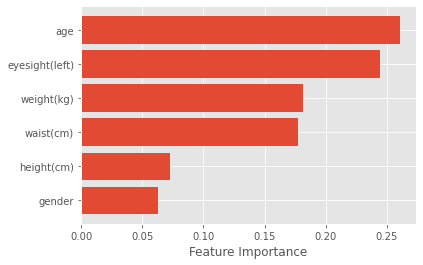

In [44]:
#feature_importances

sort = DTC.feature_importances_.argsort()
plt.barh(df.columns[sort], DTC.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [45]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

ypred = rf.predict(X_test)

print("Score the X-train with Y-train is : ", rf.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", rf.score(X_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,ypred)*100)

Score the X-train with Y-train is :  0.999512620562282
Score the X-test  with Y-test  is :  0.790339956906871
Accuracy Score : 79.03399569068709


In [46]:
print(X_test)

       age  gender  height(cm)  systolic  hemoglobin  triglyceride
33967   45       0         160     111.0        11.3          79.0
21956   55       0         145     104.0        14.0         212.0
15458   25       1         170     110.0        16.6         348.0
36215   45       1         170     124.0        14.9         263.0
8886    40       1         165     123.0        16.4         137.0
...    ...     ...         ...       ...         ...           ...
6146    35       1         175     124.0        16.3         203.0
49172   40       1         165     106.0        15.6          88.0
40065   30       1         175     148.0        16.1          82.0
3063    45       0         150     104.0        12.8          58.0
45382   50       0         155     114.0        12.9          46.0

[16708 rows x 6 columns]


In [47]:
rfclassification_report = classification_report(y_test, ypred)

# Print the training classification report
print(rfclassification_report)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83     10557
           1       0.71      0.73      0.72      6151

    accuracy                           0.79     16708
   macro avg       0.77      0.78      0.78     16708
weighted avg       0.79      0.79      0.79     16708



Text(0.5, 0, 'Feature Importance')

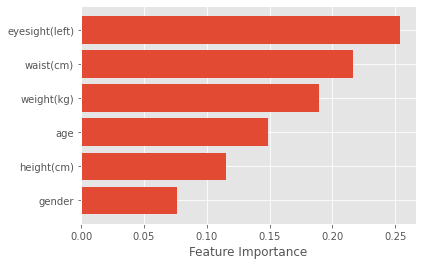

In [48]:
#feature_importances

sort = rf.feature_importances_.argsort()
plt.barh(df.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [49]:
from joblib import dump
# https://scikit-learn.org/stable/model_persistence.html
dump(rf, '../model2.joblib')

['../model2.joblib']